In [2]:
# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat

# Geospatial Analysis
import geopandas as gpd
import folium
from h3 import h3

# General-purpose
import numpy as np
import scipy

#My-SQL
import mysql.connector
from mysql.connector import Error

## Connect to Database with Gett Data

---

In [3]:
try:
    connection = mysql.connector.connect(host='localhost',
                                         database='gett_taxi_database',
                                         user='root',
                                         password='admin')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
# finally:
#     if connection.is_connected():
#         cursor.close()
#         connection.close()
#         print("MySQL connection is closed")

Connected to MySQL Server version  8.0.34
You're connected to database:  ('gett_taxi_database',)


### A Query giving us access to the data in the data_orders table.

---

In [4]:
 #The Query
sql_select_Query = "select * from data_orders"
cursor = connection.cursor()

# Execute the query
cursor.execute(sql_select_Query)

# Fetch the data
records = cursor.fetchall()

# Column names
column_names = [i[0] for i in cursor.description]

# Put the data into a pandas DataFrame
df = pd.DataFrame(records, columns=column_names)

# Don't forget to close the cursor and connection
cursor.close()
connection.close()

# Display the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_gk                       10716 non-null  int64  
 1   order_time                     10716 non-null  object 
 2   origin_longitude               10716 non-null  object 
 3   origin_latitude                10716 non-null  object 
 4   minutes_order_eta              2814 non-null   float64
 5   order_status_key               10716 non-null  object 
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 669.9+ KB


#### Updating Column Data Types

In [5]:
#First thing we want to do is get our Data types correct for our use case:
df["order_status_key"] = df["order_status_key"].astype("category")
df["is_driver_assigned_key"] = df["is_driver_assigned_key"].astype("category")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   order_gk                       10716 non-null  int64   
 1   order_time                     10716 non-null  object  
 2   origin_longitude               10716 non-null  object  
 3   origin_latitude                10716 non-null  object  
 4   minutes_order_eta              2814 non-null   float64 
 5   order_status_key               10716 non-null  category
 6   is_driver_assigned_key         10716 non-null  category
 7   cancellations_time_in_seconds  7307 non-null   float64 
dtypes: category(2), float64(2), int64(1), object(3)
memory usage: 523.6+ KB


1. Build up distribution of orders according to reasons for failure. Cancellations before and after driver assignment 
and who cancelled the order (system or client).

    Analyze the resulting plot. Which category has the highest number of orders?

---

#### Bar plot comparing Order Status Key

In [7]:
#The index represents the unique cancellation codes in the data and the values are the count.
#df['order_status_key'].value_counts()


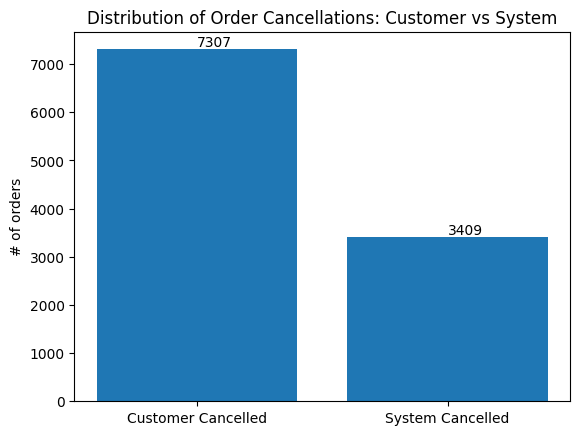

In [25]:
# Get the value counts
value_counts = df['order_status_key'].value_counts()

# Get categories and values
categories = value_counts.index
values = value_counts.values

# Create the bar plot
bars = plt.bar(categories, values)

# Add text labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va: vertical alignment

plt.xticks(categories,['Customer Cancelled','System Cancelled'])
plt.xlabel('')
plt.ylabel('# of orders')
plt.title('Distribution of Order Cancellations: Customer vs System')

plt.show()

---
---

#### Bar plot comparing Driver assignment

In [9]:
#df['is_driver_assigned_key'].value_counts()

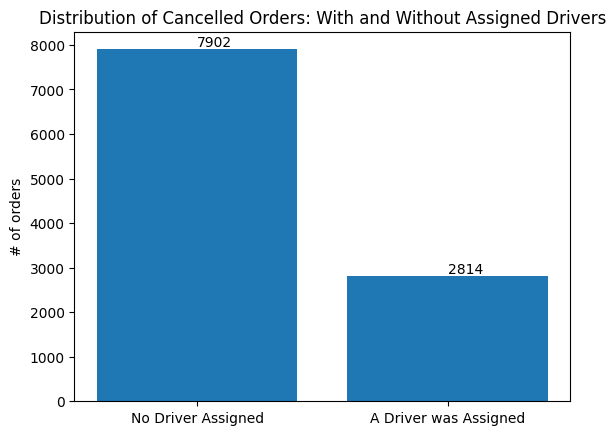

In [26]:
# Get the value counts
value_counts = df['is_driver_assigned_key'].value_counts()

# Get categories and values
categories = value_counts.index
values = value_counts.values

# Create the bar plot
bars = plt.bar(categories, values)

# Add text labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va: vertical alignment

plt.xticks(ticks=[0,1], labels=["No Driver Assigned","A Driver was Assigned"])
plt.xlabel('')
plt.ylabel('# of orders')
plt.title('Distribution of Cancelled Orders: With and Without Assigned Drivers')

plt.show()

## Important details to note before continuing:

---

-An order will only have a cancellation time recorded if the *client* cancels the order.

-If the system cancels an order than there will be no recored cancellation time.

-Every row in this table is a cancelled order so we need to divide them based on the reason for cancellation

1. Build up distribution of orders according to reasons for failure: 
cancellations before and after driver assignment, 
and reasons for order rejection. 

    Analyse the resulting plot. Which category has the highest number of orders?

In [11]:
# Don't forget to close the cursor and connection
cursor.close()
connection.close()